In [1]:
# create a multiclass classification model using a custom convolutional neural network in tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

In [4]:
root_path = '/content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name'
train_data = pathlib.Path(root_path + '/Train/')
test_data = pathlib.Path(root_path + '/Test/')

In [5]:
image_count_train = len(list(train_data.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(test_data.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [9]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [10]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


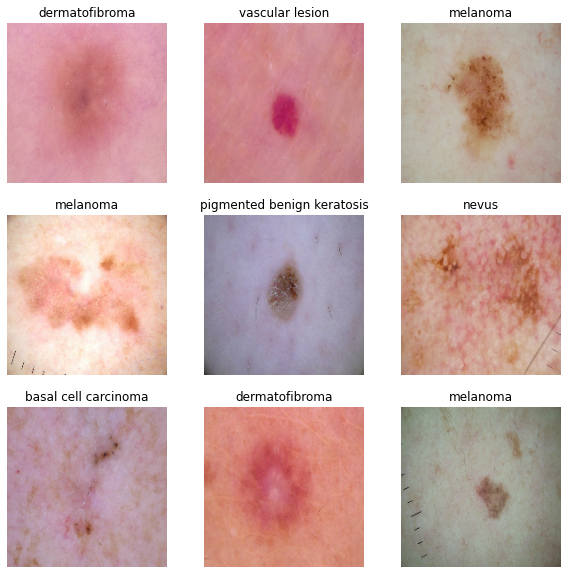

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
# Model Building

In [14]:
### Your code goes here

input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Number of classes is 9
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 178, 178, 32)     896       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 176, 176, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 88, 88, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 86, 86, 64)       18496     
 pper)                                                  

In [15]:
# Model compilation

In [16]:
# choose optimiser and loss function
optimizer = 'adam'
loss_fn = "binary_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 178, 178, 32)     896       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 176, 176, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 88, 88, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 86, 86, 64)       18496     
 pper)                                                  

In [18]:
# Model Training
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 2165s 6s/step - loss: -1279860.0000 - accuracy: 0.1335 - val_loss: -3331404.5000 - val_accuracy: 0.1151
Epoch 2/20
169/169 [==============================] - 732s 4s/step - loss: -16051100.0000 - accuracy: 0.1337 - val_loss: -34288504.0000 - val_accuracy: 0.1151
Epoch 3/20
169/169 [==============================] - 729s 4s/step - loss: -63779108.0000 - accuracy: 0.1337 - val_loss: -106795312.0000 - val_accuracy: 0.1151
Epoch 4/20
169/169 [==============================] - 730s 4s/step - loss: -161319968.0000 - accuracy: 0.1337 - val_loss: -176835696.0000 - val_accuracy: 0.1151
Epoch 5/20
169/169 [==============================] - 733s 4s/step - loss: -324028352.0000 - accuracy: 0.1337 - val_loss: -499719104.0000 - val_accuracy: 0.1151
Epoch 6/20
169/169 [==============================] - 730s 4s/step - loss: -568488640.0000 - accuracy: 0.1337 - val_loss: -718093504.0000 - val_accuracy: 0.1151
Epoch 7/20
169/169 [====================

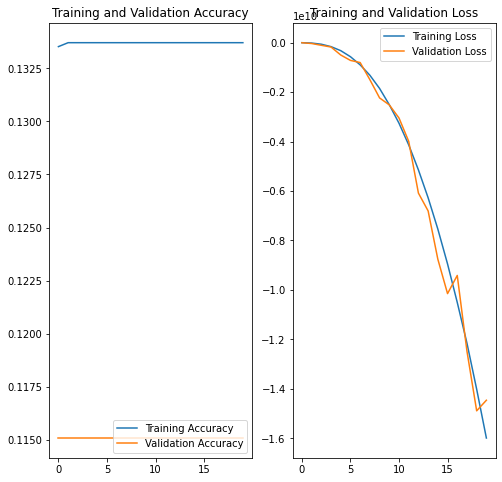

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# Handling the class imbalance in dataset

In [21]:
from glob import glob
path_list = [x for x in glob(os.path.join(train_data, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(train_data, '*', '*.jpg'))]
len(path_list)

2239

In [22]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/AI_ML_Upgrade_Assignme...,squamous cell carcinoma
1,/content/gdrive/MyDrive/AI_ML_Upgrade_Assignme...,squamous cell carcinoma
2,/content/gdrive/MyDrive/AI_ML_Upgrade_Assignme...,squamous cell carcinoma
3,/content/gdrive/MyDrive/AI_ML_Upgrade_Assignme...,squamous cell carcinoma
4,/content/gdrive/MyDrive/AI_ML_Upgrade_Assignme...,squamous cell carcinoma
...,...,...
2234,/content/gdrive/MyDrive/AI_ML_Upgrade_Assignme...,seborrheic keratosis
2235,/content/gdrive/MyDrive/AI_ML_Upgrade_Assignme...,seborrheic keratosis
2236,/content/gdrive/MyDrive/AI_ML_Upgrade_Assignme...,seborrheic keratosis
2237,/content/gdrive/MyDrive/AI_ML_Upgrade_Assignme...,seborrheic keratosis


Class=7, n=181 (8.084%)
Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=8, n=139 (6.208%)
Class=5, n=462 (20.634%)
Class=3, n=438 (19.562%)
Class=2, n=95 (4.243%)
Class=4, n=357 (15.945%)
Class=6, n=77 (3.439%)


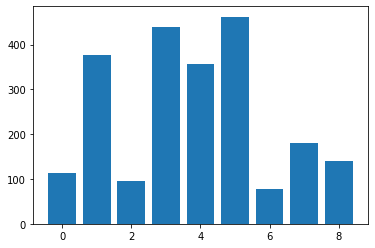

In [23]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [24]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
path_to_training_dataset="/content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCC80D79CA0>: 100%|██████████| 500/500 [00:22<00:00, 22.35 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCC82350880>: 100%|██████████| 500/500 [00:22<00:00, 22.10 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCC80DC1EE0>: 100%|██████████| 500/500 [00:22<00:00, 22.39 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCC80CE4D30>: 100%|██████████| 500/500 [01:39<00:00,  5.04 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FCC80E511F0>: 100%|██████████| 500/500 [01:26<00:00,  5.76 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCC8622CBB0>: 100%|██████████| 500/500 [00:23<00:00, 21.45 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FCC825541F0>: 100%|██████████| 500/500 [00:51<00:00,  9.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCC8676F820>: 100%|██████████| 500/500 [00:22<00:00, 21.76 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCC8233C160>: 100%|██████████| 500/500 [00:22<00:00, 22.48 Samples/s]


In [ ]:
image_count_train = len(list(train_data.glob('*/output/*.jpg')))
print(image_count_train)

In [ ]:
path_list_new = [x for x in glob(os.path.join(train_data, '*','output', '*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_data, '*','output', '*.jpg'))]

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [31]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df.value_counts()

Path                                                                                                                                                                                                                    Label                     
/content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/actinic keratosis/ISIC_0025780.jpg                                                                                               actinic keratosis             1
/content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026958.jpg_ca2ea05c-cf85-4c00-80b8-fc90d5f9869f.jpg  pigmented benign keratosis    1
/content/gdrive/MyDrive/AI_ML_Upgrade_Assignment/CNN_assignment/root_folder_name/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026941.jpg_8bf56757-3dd9-4b1d-a706-d18fd92b1e76.jpg  pigmented benign keratosis    1
/content/gdri

In [32]:
batch_size = 32
img_height = 180
img_width = 180

In [34]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [38]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
num_classes = 9
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 348s 1s/step - loss: 1.7145 - accuracy: 0.3319 - val_loss: 1.5131 - val_accuracy: 0.3996
Epoch 2/20
281/281 [==============================] - 289s 1s/step - loss: 1.2678 - accuracy: 0.5235 - val_loss: 1.3873 - val_accuracy: 0.4766
Epoch 3/20
281/281 [==============================] - 290s 1s/step - loss: 1.0193 - accuracy: 0.6251 - val_loss: 0.9819 - val_accuracy: 0.6315
Epoch 4/20
281/281 [==============================] - 289s 1s/step - loss: 0.7938 - accuracy: 0.7110 - val_loss: 0.8495 - val_accuracy: 0.7156
Epoch 5/20
281/281 [==============================] - 289s 1s/step - loss: 0.6022 - accuracy: 0.7893 - val_loss: 0.6517 - val_accuracy: 0.7868
Epoch 6/20
281/281 [==============================] - 291s 1s/step - loss: 0.4400 - accuracy: 0.8417 - val_loss: 0.5671 - val_accuracy: 0.8002
Epoch 7/20
281/281 [==============================] - 290s 1s/step - loss: 0.3366 - accuracy: 0.8789 - val_loss: 0.7199 - val_accuracy: 0.7597

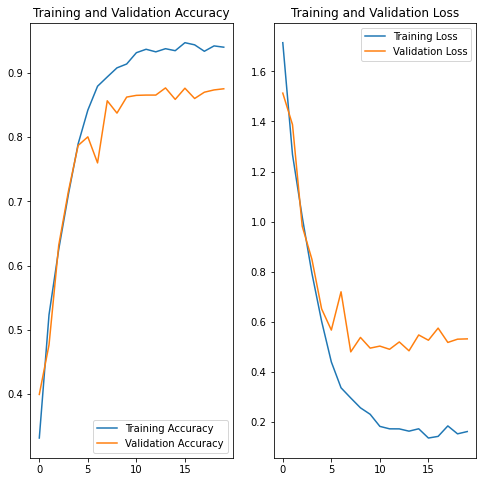

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()